In [38]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
shootings_df = pd.read_csv('data/SPD_Officer_Involved_Shooting__OIS__Data.csv')
shootings_df.columns

Index(['FRB #', 'Incident Number', 'Date / Time', 'Blurred Address',
       'Longitude', 'Latitude', 'City', 'State', 'Rank', 'Officer Gender',
       'Officer Race', 'Years of SPD Service', 'Officer Injured',
       'Number of Rounds', 'Subject Gender', 'Subject Race', 'Subject DOB',
       'Subject Age', 'Subject Weapon', 'Type of Weapon', 'Fatal', 'On-duty',
       'Disposition', 'Officer Disciplined?', 'Summary'],
      dtype='object')

In [60]:
shootings_df.shape

(156, 25)

In [129]:
recent_shootings = shootings_df[shootings_df['Date / Time'].str.contains('2019')]

In [5]:
Counter(shootings_df[shootings_df['Subject Weapon']=='No']['Subject Race'])

Counter({'White': 6, 'Asian': 1, 'Black or African American': 18})

In [6]:
Counter(shootings_df['Subject Race'])

Counter({'Asian': 14,
         'White': 77,
         'Black or African American': 55,
         'Native American': 4,
         'Hispanic': 1,
         'Nat Hawaiian/Oth Pac Islander': 1,
         'Not Specified': 4})

## Racial breakdown: armed vs unarmed SPD shooting victims

Text(0.5, 0.98, 'Racial Demography: Armed vs. Unarmed SPD Shooting Victims')

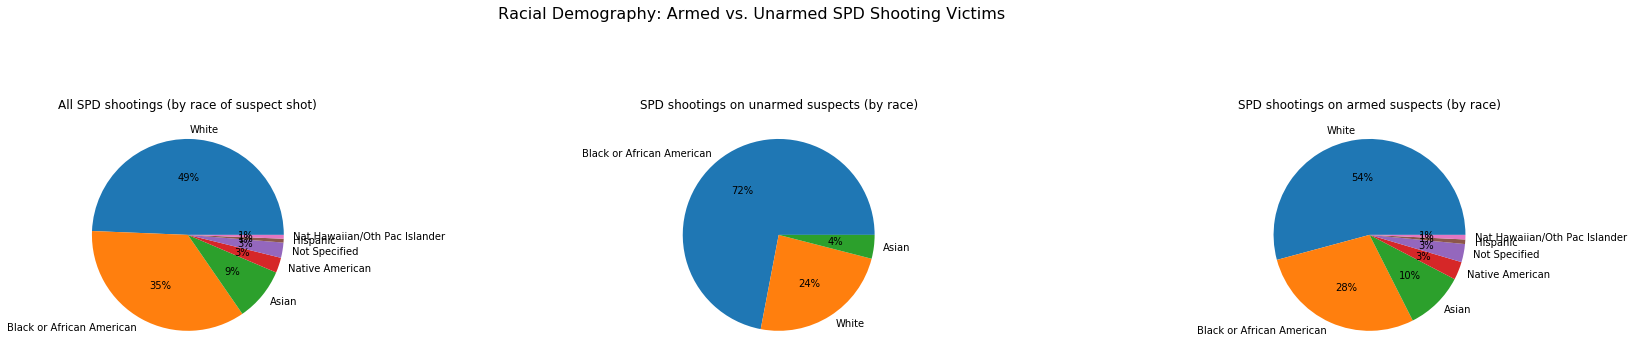

In [59]:
plt.figure(3, figsize=(30,15))
the_grid = GridSpec(3, 3)

plt.subplot(the_grid[0,0], title='All SPD shootings (by race of suspect shot)')
plt.pie(shootings_df['Subject Race'].value_counts(), labels=shootings_df['Subject Race'].value_counts().keys(), autopct='%.0f%%')

plt.subplot(the_grid[0,1], title='SPD shootings on unarmed suspects (by race)')
plt.pie(shootings_df[shootings_df['Subject Weapon']=='No']['Subject Race'].value_counts(), labels=shootings_df[shootings_df['Subject Weapon']=='No']['Subject Race'].value_counts().keys(), autopct='%.0f%%')

plt.subplot(the_grid[0,2], title='SPD shootings on armed suspects (by race)')
plt.pie(shootings_df[shootings_df['Subject Weapon']=='Yes']['Subject Race'].value_counts(), labels=shootings_df[shootings_df['Subject Weapon']=='Yes']['Subject Race'].value_counts().keys(), autopct='%.0f%%')


plt.suptitle('Racial Demography: Armed vs. Unarmed SPD Shooting Victims', fontsize=16)

Text(0.5, 0.98, 'Racial Demography: Armed vs. Unarmed SPD Shooting Victims')

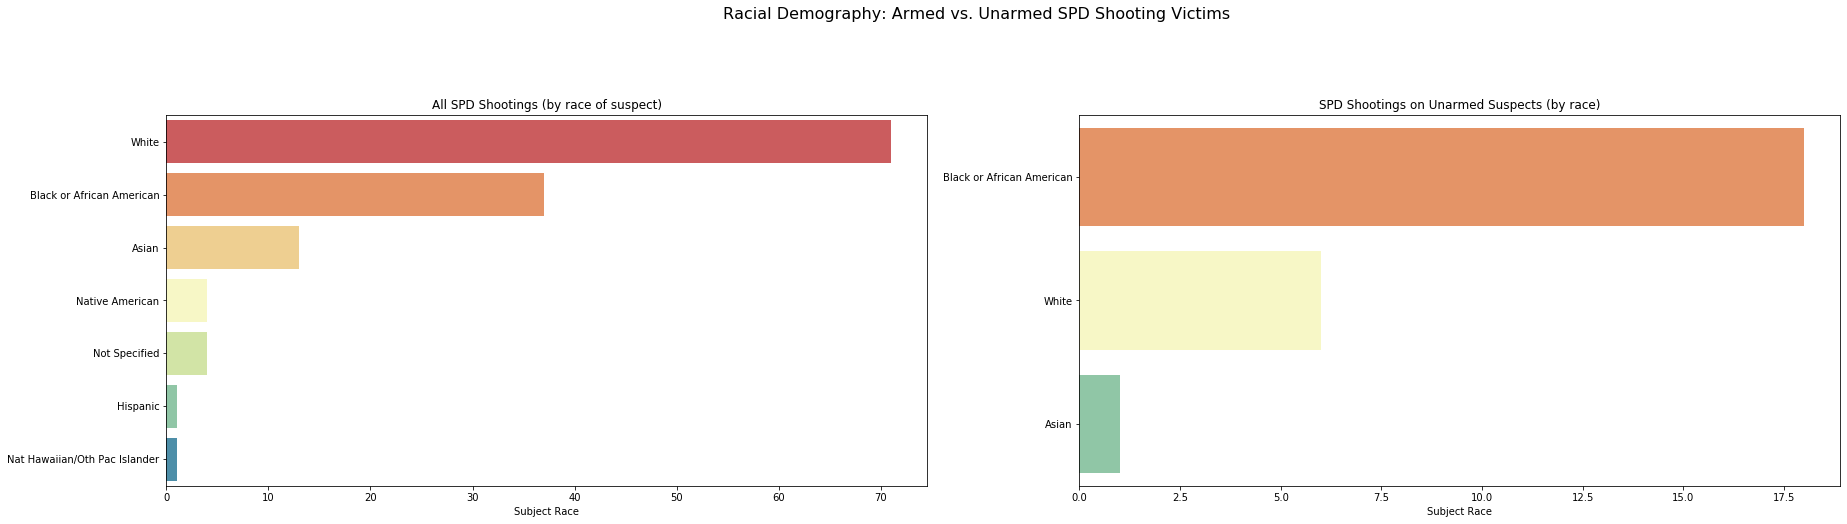

In [69]:
plt.figure(2, figsize=(30,15))
the_grid = GridSpec(2, 2)

X_unarmed = shootings_df[shootings_df['Subject Weapon']=='No']['Subject Race'].value_counts()
X_all = shootings_df[shootings_df['Subject Weapon']=='Yes']['Subject Race'].value_counts()

plt.subplot(the_grid[0, 0],  title='All SPD Shootings (by race of suspect)')
sns.barplot(X_all,X_all.keys(), palette='Spectral')

plt.subplot(the_grid[0, 1], title='SPD Shootings on Unarmed Suspects (by race)')
sns.barplot(X_unarmed,X_unarmed.keys(), palette='Spectral')

plt.suptitle('Racial Demography: Armed vs. Unarmed SPD Shooting Victims', fontsize=16)

## Officer discipline: 'Disposition' 2019

In [130]:
recent_shootings.Disposition.value_counts()

Within Policy    11
Name: Disposition, dtype: int64

In [132]:
for i in recent_shootings[recent_shootings.Disposition=='Within Policy']['Summary']:
    print(i)
    print('------------')

On the 7th of February 2019, at 3:22 A.M., the Seattle Police Communication Center received a 911 call from a resident in the 10500 block of Midvale Avenue North. The caller reported hearing a female screaming for help in Spanish, asking for someone to “call the police.” At 3:28 A.M., the first of three Seattle Police Officers arrived at the location, an apartment building and began investigating. A witness directed them to a unit in the apartment complex, where the officers attempted contact but received no reply. The officers began to clear the area and were in the parking lot when the Communication Center received a 911 call from inside the unit the officers just attempted to contact. The female caller said repeatedly, “He killed her.” At 3:41 A.M., officers, dressed in full uniform and announcing themselves as Seattle Police made forced entry with their weapons drawn and began clearing the apartment. Through their search of the unit, officers identified a door which was significant

## Officer discipline

In [71]:
shootings_df['Officer Disciplined?'].value_counts()

No         130
Missing     15
Yes         10
Name: Officer Disciplined?, dtype: int64

In [72]:
shootings_df['Fatal'].value_counts()

Yes    79
No     77
Name: Fatal, dtype: int64

In [77]:
# Shootings where suspect was killed, but officer was not disciplined
shootings_df[(shootings_df['Officer Disciplined?']=='No')&(shootings_df['Fatal']=='Yes')]

FRB #  Incident Number             Date / Time  \
1    FRB 05-03   20050000174022  04/29/2005 03:30:00 AM   
2    FRB 05-04   20050000256303  06/20/2005 11:30:00 AM   
3    FRB 05-04   20050000256303  06/20/2005 12:30:00 PM   
13   FRB 06-05   20060000165112  04/25/2006 08:17:00 PM   
14   FRB 06-05   20060000165112  04/25/2006 09:17:00 PM   
..         ...              ...                     ...   
144        NaN   20180000486972  12/31/2018 05:01:00 PM   
145        NaN   20190000048393  02/07/2019 03:22:00 AM   
146        NaN   20190000048393  02/07/2019 03:22:00 AM   
152        NaN   20190000165328  05/08/2019 07:24:00 PM   
153        NaN   20190000165328  05/08/2019 07:24:00 PM   

              Blurred Address   Longitude   Latitude     City State  \
1        65XX BLOCK OF 1 AV S -122.334513  47.544177  Seattle    WA   
2     7XX BLOCK OF STEWART ST -122.335725  47.614620  Seattle    WA   
3     7XX BLOCK OF STEWART ST -122.335725  47.614620  Seattle    WA   
13     BROADWAY E / E JOHN ST -122.320873  47.619908  Seattle    WA   
14     BROADWAY E / E JOHN ST -122.320873  47.619908  Seattle    WA   
..                        ...         ...        ...      ...   ...   
144     N 96 ST / AURORA AV N -122.344620  47.698530  Seattle    WA   
145  105XX BLOCK MIDVALE AV N -122.343340  47.705960  Seattle    WA   
146  105XX BLOCK MIDVALE AV N -122.343340  47.705960  Seattle    WA   
152          600 BLOCK 3 AV W -122.360624  47.625198  Seattle    WA   
153          600 BLOCK 3 AV W -122.360624  47.625198  Seattle    WA   

               Rank Officer Gender  ...                   Subject Race  \
1           Officer           Male  ...                          White   
2           Officer           Male  ...                          White   
3           Officer           Male  ...                          White   
13          Officer           Male  ...                          White   
14          Officer           Male  ...                          White   
..              ...            ...  ...                            ...   
144  POLICE OFFICER           Male  ...  Nat Hawaiian/Oth Pac Islander   
145  POLICE OFFICER           Male  ...                  Not Specified   
146  POLICE OFFICER           Male  ...                  Not Specified   
152  POLICE OFFICER           Male  ...                  Not Specified   
153  POLICE OFFICER           Male  ...                  Not Specified   

                 Subject DOB Subject Age Subject Weapon  \
1    1969-08-02T00:00:00.000          36             No   
2    1952-11-15T00:00:00.000          53            Yes   
3    1952-11-15T00:00:00.000          53            Yes   
13   1988-03-08T00:00:00.000          18            Yes   
14   1988-03-08T00:00:00.000          18            Yes   
..                       ...         ...            ...   
144  1982-10-09T00:00:00.000          36            Yes   
145  1900-01-01T00:00:00.000         117            Yes   
146  1900-01-01T00:00:00.000         117            Yes   
152  1900-01-01T00:00:00.000         118            Yes   
153  1900-01-01T00:00:00.000         118            Yes   

                                    Type of Weapon Fatal On-duty  \
1                                              NaN   Yes     Yes   
2    Grenade, backpack reported to have explosives   Yes     Yes   
3    Grenade, backpack reported to have explosives   Yes     Yes   
13                                   Colt Revolver   Yes     Yes   
14                                   Colt Revolver   Yes     Yes   
..                                             ...   ...     ...   
144                                        Handgun   Yes     Yes   
145                                          Knife   Yes     Yes   
146                                          Knife   Yes     Yes   
152                                          Knife   Yes     Yes   
153                                          Knife   Yes     Yes   

       Disposition Officer Disci

In [93]:
# Shootings where suspect was UNARMED and KILLED, but officer was not disciplined
unarmed_and_fatal = shootings_df[(shootings_df['Officer Disciplined?']=='No')&(shootings_df['Fatal']=='Yes')&(shootings_df['Subject Weapon']=='No')]
print('no. of fatal shootings on unarmed citizens where officers were not disciplined',len(unarmed_and_fatal))
print('\n-------------\n',unarmed_and_fatal['Summary'][1])
print('\n-------------\n',unarmed_and_fatal['Summary'][54])

no. of fatal shootings on unarmed citizens where officers were not disciplined 2

-------------
 On April 29th, 2005, at approximately 3:35 A.M., an on duty Patrol Officer responded to assist in locating a possibly suicidal person, in the area of the 1st Avenue South Bridge. The subject was located in steep terrain and bushes after having jumped from the bridge. Officers approached the subject, and while attempting to take the subject into custody, the subject made attempts to grab both officers’ firearms. An officer fired two rounds, striking the subject. 

The subject was transported by medics to Harborview Medical Center where he died.  

The subject was not armed by attempted to take or control the firearms of both officers.

-------------
 On October 23rd, 2011, at approximately 2:30 P.M. Seattle Police Detectives located a subject matching the description of a person believed to be involved in a homicide they were investigating. The subject was sitting near the intersection of 5t